# Documented Process:
    >Establish formula for distribution
    >Derive the Nagtive Log Likelihood
    >Define a loss function to calculate the NLL
    >Define Model
    >Use Gradient Descent
    >Load the dataset in 
    >Progress with iterations
    >Generate Lamda value
    >Generate K value
    >Plot graph for reference

In [1]:
%pylab inline
import numpy as np
import torch as th
import torch.nn as nn
import torch.optim as optim

Populating the interactive namespace from numpy and matplotlib


In [2]:
##########LOSS FUNCTION##########
#################################

def loss_function(dataset, lam, k, eps=0.001):
    
    A = th.log(k) - th.log(lam)
    B = (k - 1)* (th.log(dataset) - th.log(lam))
    C = -((dataset/lam )**k)                      
    
    ans = th.mean( A + B + C) #scales down value
    return -ans               #negative log likelihood                  

#########THE MODEL CLASS#########
#################################

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        lam_prime = np.random.normal()                      #generate random number
        self.lam_prime = nn.Parameter(th.tensor(lam_prime)) #assign
        k_prime = np.random.normal() 
        self.k_prime = nn.Parameter(th.tensor(k_prime))
        
    def lam(self):
        return th.abs(self.lam_prime)                   #returns the absolute value
    
    def k(self):
        return th.abs(self.k_prime) 
    
    
    def loss(self, dataset):
        return loss_function(dataset, self.lam(), self.k())

In [3]:
#####INSTANTIATING THE MODEL#####
#################################

model = Model()                                         #instantiate model class
lr = 0.1                                                #learning rate
optimiser = optim.SGD(model.parameters(), lr=lr) 
num_iters = 1000                                        #number of iterations
loss_curve = []                                         #used to keep track of all the losses
print("~Mav")

~Mav


In [4]:
#######LOADING IN THE DATA#######
#################################

fp = open('data.npy', 'rb')
dataset = np.load(fp)
fp.close()
dataset = th.tensor(dataset, dtype=th.float32)

In [5]:
###APPENDING TO THE LOSS CURVE###
#################################

for i in range(num_iters):
    optimiser.zero_grad()
    loss_value = model.loss(dataset)
    loss_curve.append(loss_value.data.item())
    loss_value.backward()
    optimiser.step()

In [6]:
############# LAMDA #############
#################################

lam = model.lam().detach().numpy()
print(lam)

1.2069225


In [7]:
############### K ###############
#################################

k = model.k().detach().numpy()
print(k)

0.95874995


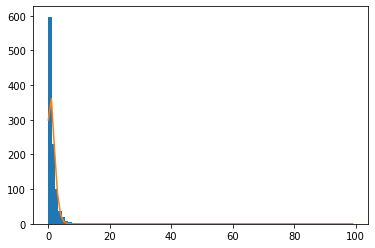

In [8]:
########PLOTTING THE DATA########
#################################

histogram = plt.hist(dataset.numpy(), bins=int(np.max(dataset.numpy())))
arr = []
for i in range(100): #for 100 itareations
    prob = (lam ** i) * np.exp(-lam)
    prob = prob / np.math.factorial(i)
    arr.append(prob * len(dataset))
plt.plot(list(range(100)), arr)